In [9]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import numpy as np
import json
from pathlib import Path
import os
import polars as pl
import pandas as pd
import re

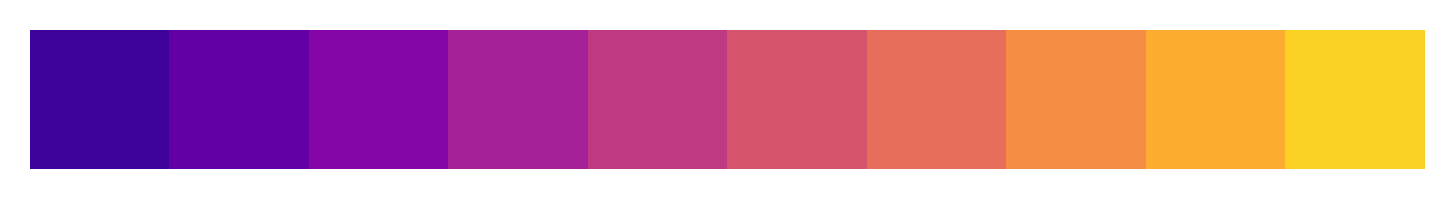

In [5]:
# plot settings
plt.rcParams['figure.figsize'] = [5, 5]
plt.rcParams['figure.dpi'] = 300

# use seaborn style
sns.set_theme(style="darkgrid")

# styling
# colormaps
cm_viridis = plt.get_cmap('viridis')
cm_plasma = plt.get_cmap('plasma')
cm_rainbow = plt.get_cmap('rainbow')
cm_gist_rainbow = plt.get_cmap('gist_rainbow')

cmap = cm_plasma # set colormap
# get colormap colors
def get_colors(amount: int, offset: int = 0):
    return [
        cmap(i)
        for i in np.linspace(0, 1, amount + offset*2)
    ][offset:-offset if offset != 0 else None]

# preview colors
fig, ax = plt.subplots(figsize=(6, 1))
colors = get_colors(10, offset=1)
ax.imshow([colors], extent=[0, len(colors), 0, 1])
ax.axis('off')
plt.show()

In [7]:
home = os.path.expanduser("~")

# Taking the paths for simpletrack results, detailed and summary
# and taking the path for detection results, detailed and summary
# function constructing a nested dictionary

def get_results(path: str):
    return {
        "path_detailed": Path(path + "/metrics_details.json"),
        "path_summary": Path(path + "/metrics_summary.json")
    }

def get_data(results):
    return {
        "data_detailed": json.load(open(results["path_detailed"])),
        "data_summary": json.load(open(results["path_summary"]))
    }

cp_0060_detections = get_data(get_results("/home/cv08f23/point-cloud-object-tracking/OpenPCDet/output/cbgs_voxel_res3d_centerpoint_custom/default/eval/epoch_30/val/default/final_result"))
cp_0060_tracking = get_data(get_results("/home/cv08f23/datasets/simpletrack/tracking/nuscenes_data/cp_0.06/debug/eval"))

# simpletrack = {
#     "path_detailed": "simpletrack-results/metrics_details.json",
#     "path_summary": "simpletrack-results/metrics_summary.json"
# }

simpletrack["data_detailed"] = json.load(open(simpletrack["path_detailed"]))
simpletrack["data_summary"] = json.load(open(simpletrack["path_summary"]))

FileNotFoundError: [Errno 2] No such file or directory: '/home/cv08f23/datasets/simpletrack/tracking/nuscenes_data/debug/eval/metrics_details.json'

In [30]:
for metric, val in data_summary['label_metrics'].items():
    if metric == 'ids' or metric == 'gt':
        fn = np.sum
    else:
        fn = np.mean

    print(f"{metric}:\t{fn(list(val.values())):.3f}")

amota:	0.642
amotp:	0.643
recall:	0.679
motar:	0.811
gt:	101897.000
mota:	0.550
motp:	0.362
mt:	603.571
ml:	216.571
faf:	46.133
tp:	11396.286
fp:	1947.714
fn:	3072.286
ids:	617.000
frag:	84.714
tid:	0.719
lgd:	1.112


In [5]:
kitti_results_path = "/home/cv08f23/point-cloud-object-tracking/OpenPCDet/output/pointpillar/default/eval/epoch_23/val/default/result.pkl"

# load kitti results
kitti_results = pd.read_pickle(kitti_results_path)

# print
kitti_results

[{'name': array(['Car', 'Car', 'Cyclist', 'Car', 'Car', 'Car', 'Car', 'Car',
         'Pedestrian', 'Car', 'Car'], dtype='<U10'),
  'truncated': array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
  'occluded': array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
  'alpha': array([-4.489348 , -7.9280767, -8.133834 , -4.3535976, -4.13725  ,
         -4.3149047, -4.633415 , -4.5397024, -5.2725   , -7.8015366,
         -4.972166 ], dtype=float32),
  'bbox': array([[391.0179  , 181.3144  , 421.73505 , 200.71298 ],
         [768.20416 , 175.82864 , 812.1937  , 214.6499  ],
         [677.0899  , 167.45766 , 691.4276  , 195.70222 ],
         [308.47385 , 182.34845 , 380.63446 , 218.83948 ],
         [216.82884 , 187.39117 , 277.22403 , 212.88383 ],
         [210.99515 , 187.00854 , 272.7558  , 218.5811  ],
         [641.7057  , 170.26393 , 664.3827  , 190.26111 ],
         [125.856346, 192.60378 , 172.46399 , 222.86205 ],
         [203.02014 , 179.00713 , 219.44911 , 210.40355 ],
         [6

In [30]:
kitti_metrics = """
Car AP@0.70, 0.70, 0.70:
bbox AP:90.7786, 89.8116, 88.8013
bev  AP:89.6590, 87.1665, 84.3820
3d   AP:86.4659, 77.2890, 74.6545
aos  AP:90.77, 89.62, 88.48
Car AP_R40@0.70, 0.70, 0.70:
bbox AP:95.6611, 92.2492, 91.3318
bev  AP:92.0464, 88.0591, 86.6670
3d   AP:87.7577, 78.3935, 75.1832
aos  AP:95.64, 92.04, 90.98
Car AP@0.70, 0.50, 0.50:
bbox AP:90.7786, 89.8116, 88.8013
bev  AP:90.7894, 90.1836, 89.4612
3d   AP:90.7894, 90.0652, 89.2499
aos  AP:90.77, 89.62, 88.48
Car AP_R40@0.70, 0.50, 0.50:
bbox AP:95.6611, 92.2492, 91.3318
bev  AP:95.6991, 94.7108, 93.9990
3d   AP:95.6877, 94.3743, 93.4309
aos  AP:95.64, 92.04, 90.98
Pedestrian AP@0.50, 0.50, 0.50:
bbox AP:66.5685, 62.4971, 59.3051
bev  AP:61.6097, 56.2671, 52.5945
3d   AP:57.7697, 52.3000, 47.9211
aos  AP:48.65, 45.63, 42.93
Pedestrian AP_R40@0.50, 0.50, 0.50:
bbox AP:66.5922, 62.4226, 58.7912
bev  AP:61.5757, 56.0098, 52.0071
3d   AP:57.3090, 51.4506, 46.8697
aos  AP:45.90, 42.99, 40.03
Pedestrian AP@0.50, 0.25, 0.25:
bbox AP:66.5685, 62.4971, 59.3051
bev  AP:72.5086, 69.4913, 66.4392
3d   AP:72.4390, 69.3009, 65.3154
aos  AP:48.65, 45.63, 42.93
Pedestrian AP_R40@0.50, 0.25, 0.25:
bbox AP:66.5922, 62.4226, 58.7912
bev  AP:73.8718, 70.4717, 66.6120
3d   AP:73.7886, 70.1973, 66.0228
aos  AP:45.90, 42.99, 40.03
Cyclist AP@0.50, 0.50, 0.50:
bbox AP:85.2661, 72.9820, 68.9809
bev  AP:82.2472, 66.2221, 62.6140
3d   AP:80.0483, 62.7554, 59.7148
aos  AP:84.72, 71.10, 67.12
Cyclist AP_R40@0.50, 0.50, 0.50:
bbox AP:88.5676, 74.0533, 69.7894
bev  AP:85.2682, 66.3373, 62.3481
3d   AP:81.5656, 63.0033, 59.0390
aos  AP:87.91, 71.99, 67.80
Cyclist AP@0.50, 0.25, 0.25:
bbox AP:85.2661, 72.9820, 68.9809
bev  AP:86.5731, 70.6008, 66.9333
3d   AP:86.5731, 70.6008, 66.9333
aos  AP:84.72, 71.10, 67.12
Cyclist AP_R40@0.50, 0.25, 0.25:
bbox AP:88.5676, 74.0533, 69.7894
bev  AP:88.8792, 71.7333, 67.7628
3d   AP:88.8792, 71.7333, 67.7628
aos  AP:87.91, 71.99, 67.80
"""

classes = ["Car", "Pedestrian", "Cyclist"]

reg = re.compile(r"()")

kitti_metrics = reg.findall(kitti_metrics)

# # transform to dataframe
# kitti_metrics = pd.DataFrame([x.split() for x in kitti_metrics.split("\n") if x != ""])

# # # set columns
# # kitti_metrics.columns = ["class", "metric", "easy", "moderate", "hard"]

# # # set index
# # kitti_metrics = kitti_metrics.set_index(["class", "metric"])

kitti_metrics

['',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',


In [36]:
import re
kitti_metrics = """
Car AP@0.70, 0.70, 0.70:
bbox AP:90.7786, 89.8116, 88.8013
bev  AP:89.6590, 87.1665, 84.3820
3d   AP:86.4659, 77.2890, 74.6545
aos  AP:90.77, 89.62, 88.48
Car AP_R40@0.70, 0.70, 0.70:
bbox AP:95.6611, 92.2492, 91.3318
bev  AP:92.0464, 88.0591, 86.6670
3d   AP:87.7577, 78.3935, 75.1832
aos  AP:95.64, 92.04, 90.98
Car AP@0.70, 0.50, 0.50:
bbox AP:90.7786, 89.8116, 88.8013
bev  AP:90.7894, 90.1836, 89.4612
3d   AP:90.7894, 90.0652, 89.2499
aos  AP:90.77, 89.62, 88.48
Car AP_R40@0.70, 0.50, 0.50:
bbox AP:95.6611, 92.2492, 91.3318
bev  AP:95.6991, 94.7108, 93.9990
3d   AP:95.6877, 94.3743, 93.4309
aos  AP:95.64, 92.04, 90.98
Pedestrian AP@0.50, 0.50, 0.50:
bbox AP:66.5685, 62.4971, 59.3051
bev  AP:61.6097, 56.2671, 52.5945
3d   AP:57.7697, 52.3000, 47.9211
aos  AP:48.65, 45.63, 42.93
Pedestrian AP_R40@0.50, 0.50, 0.50:
bbox AP:66.5922, 62.4226, 58.7912
bev  AP:61.5757, 56.0098, 52.0071
3d   AP:57.3090, 51.4506, 46.8697
aos  AP:45.90, 42.99, 40.03
Pedestrian AP@0.50, 0.25, 0.25:
bbox AP:66.5685, 62.4971, 59.3051
bev  AP:72.5086, 69.4913, 66.4392
3d   AP:72.4390, 69.3009, 65.3154
aos  AP:48.65, 45.63, 42.93
Pedestrian AP_R40@0.50, 0.25, 0.25:
bbox AP:66.5922, 62.4226, 58.7912
bev  AP:73.8718, 70.4717, 66.6120
3d   AP:73.7886, 70.1973, 66.0228
aos  AP:45.90, 42.99, 40.03
Cyclist AP@0.50, 0.50, 0.50:
bbox AP:85.2661, 72.9820, 68.9809
bev  AP:82.2472, 66.2221, 62.6140
3d   AP:80.0483, 62.7554, 59.7148
aos  AP:84.72, 71.10, 67.12
Cyclist AP_R40@0.50, 0.50, 0.50:
bbox AP:88.5676, 74.0533, 69.7894
bev  AP:85.2682, 66.3373, 62.3481
3d   AP:81.5656, 63.0033, 59.0390
aos  AP:87.91, 71.99, 67.80
Cyclist AP@0.50, 0.25, 0.25:
bbox AP:85.2661, 72.9820, 68.9809
bev  AP:86.5731, 70.6008, 66.9333
3d   AP:86.5731, 70.6008, 66.9333
aos  AP:84.72, 71.10, 67.12
Cyclist AP_R40@0.50, 0.25, 0.25:
bbox AP:88.5676, 74.0533, 69.7894
bev  AP:88.8792, 71.7333, 67.7628
3d   AP:88.8792, 71.7333, 67.7628
aos  AP:87.91, 71.99, 67.80
"""

# Define the classes
classes = ["Car", "Cyclist", "Pedestrian"]

# Split the text by class
class_kitti_metrics = {c: re.findall(f"{c}.*?(?={c}|$)", kitti_metrics, re.DOTALL) for c in classes}

# Let's print the data for each class
for cls, cls_data in class_kitti_metrics.items():
    print(f"Data for {cls}:")
    for block in cls_data:
        block = str.join(", ", str.join(", ", block.split(":")).split("@"))
        print(block)
    print("\n")

# write to file
try:
    with open("./kitti_metrics.txt", "w") as f:
        for cls, cls_data in class_kitti_metrics.items():
            if cls != "Car":
                print("Skipping class", cls)
                continue
            f.write(f"Data for {cls}:\n")
            for block in cls_data:
                block = str.join(", ", str.join(", ", block.split(":")).split("@"))
                f.write(block + "\n")
            f.write("\n")
except:
    print("Error writing to file")

Data for Car:
Car AP, 0.70, 0.70, 0.70, 
bbox AP, 90.7786, 89.8116, 88.8013
bev  AP, 89.6590, 87.1665, 84.3820
3d   AP, 86.4659, 77.2890, 74.6545
aos  AP, 90.77, 89.62, 88.48

Car AP_R40, 0.70, 0.70, 0.70, 
bbox AP, 95.6611, 92.2492, 91.3318
bev  AP, 92.0464, 88.0591, 86.6670
3d   AP, 87.7577, 78.3935, 75.1832
aos  AP, 95.64, 92.04, 90.98

Car AP, 0.70, 0.50, 0.50, 
bbox AP, 90.7786, 89.8116, 88.8013
bev  AP, 90.7894, 90.1836, 89.4612
3d   AP, 90.7894, 90.0652, 89.2499
aos  AP, 90.77, 89.62, 88.48

Car AP_R40, 0.70, 0.50, 0.50, 
bbox AP, 95.6611, 92.2492, 91.3318
bev  AP, 95.6991, 94.7108, 93.9990
3d   AP, 95.6877, 94.3743, 93.4309
aos  AP, 95.64, 92.04, 90.98
Pedestrian AP, 0.50, 0.50, 0.50, 
bbox AP, 66.5685, 62.4971, 59.3051
bev  AP, 61.6097, 56.2671, 52.5945
3d   AP, 57.7697, 52.3000, 47.9211
aos  AP, 48.65, 45.63, 42.93
Pedestrian AP_R40, 0.50, 0.50, 0.50, 
bbox AP, 66.5922, 62.4226, 58.7912
bev  AP, 61.5757, 56.0098, 52.0071
3d   AP, 57.3090, 51.4506, 46.8697
aos  AP, 45.90, 42.9